In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import warnings


In [5]:
df=pd.read_csv(r"raw.csv")

In [6]:
df.head()

,year,mileage,brand,model,price
0,2006.0,194495.0,Toyota,Corolla,10347.0
1,2007.0,10390.0,Toyota,Corolla,22153.0
2,2011.0,111997.0,Ford,Mustang,18892.0
3,2015.0,143671.0,Audi,A4,18183.0
4,2002.0,119364.0,Audi,A3,13359.0


In [7]:
df.shape

(1742, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     1742 non-null   float64
 1   mileage  1742 non-null   float64
 2   brand    1655 non-null   object 
 3   model    1656 non-null   object 
 4   price    1742 non-null   float64
dtypes: float64(3), object(2)
memory usage: 68.2+ KB


In [9]:
# convert year data types float to int32
df['year'] = df['year'].astype('int32')


In [10]:
df.describe()

,year,mileage,price
count,1742.000000,1742.000000,1742.000000
mean,2010.939150,101232.756028,19333.528703
std,6.695114,59396.185277,6462.262272
min,1990.000000,45.000000,7570.000000
25%,2005.000000,50913.500000,15695.250000
50%,2011.000000,100684.000000,18967.500000
75%,2017.000000,149222.750000,22319.000000
max,2022.000000,428752.000000,97615.000000


In [11]:
df.isnull().sum()

year        0
mileage     0
brand      87
model      86
price       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(9)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df['year'].nunique()

28

In [15]:
df['brand'].value_counts()

brand
Honda     338
Ford      336
BMW       335
Audi      331
Toyota    306
Name: count, dtype: int64

In [16]:
df['model'].value_counts()

model
Accord      120
3 Series    118
A3          117
Fit         117
Fusion      115
Camry       113
A4          112
X3          111
Focus       109
Mustang     107
5 Series    107
Prius       106
Civic       102
Q5           99
Corolla      94
Name: count, dtype: int64

# Exploratory Data Analysis EDA

In [17]:
df.head(10)

,year,mileage,brand,model,price
0,2006,194495.0,Toyota,Corolla,10347.0
1,2007,10390.0,Toyota,Corolla,22153.0
2,2011,111997.0,Ford,Mustang,18892.0
3,2015,143671.0,Audi,A4,18183.0
4,2002,119364.0,Audi,A3,13359.0
5,2006,187364.0,Audi,Q5,13025.0
6,2012,125083.0,Audi,A4,18574.0
7,2017,34342.0,Audi,Q5,23425.0
8,2010,100701.0,Audi,A4,20086.0
9,2012,91651.0,Ford,Focus,18688.0


In [18]:
# Fill null values with the mode
df['brand'].fillna(df['brand'].mode()[0], inplace=True)
df['model'].fillna(df['model'].mode()[0], inplace=True)

In [19]:
df.isnull().sum()

year       0
mileage    0
brand      0
model      0
price      0
dtype: int64

Text(0.5, 1.0, 'Distribution of Price')

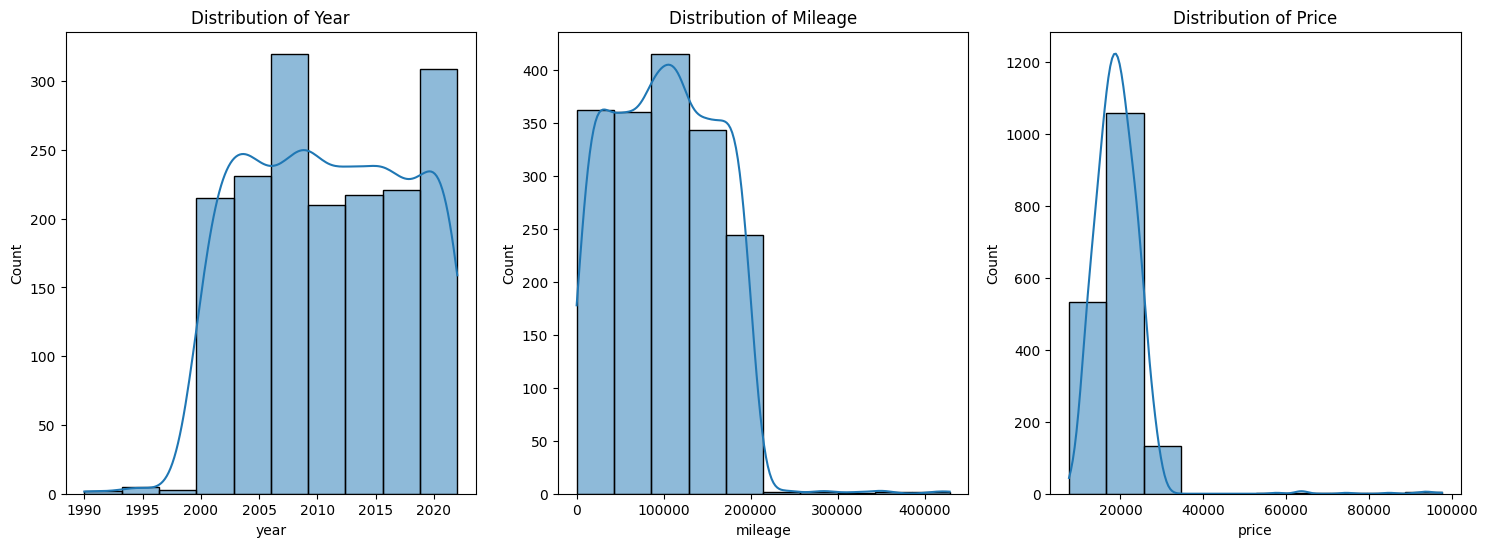

In [20]:

# Plotting
# Histogram for numerical data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['year'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Year')
sns.histplot(df['mileage'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Mileage')
sns.histplot(df['price'], bins=10, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Price')



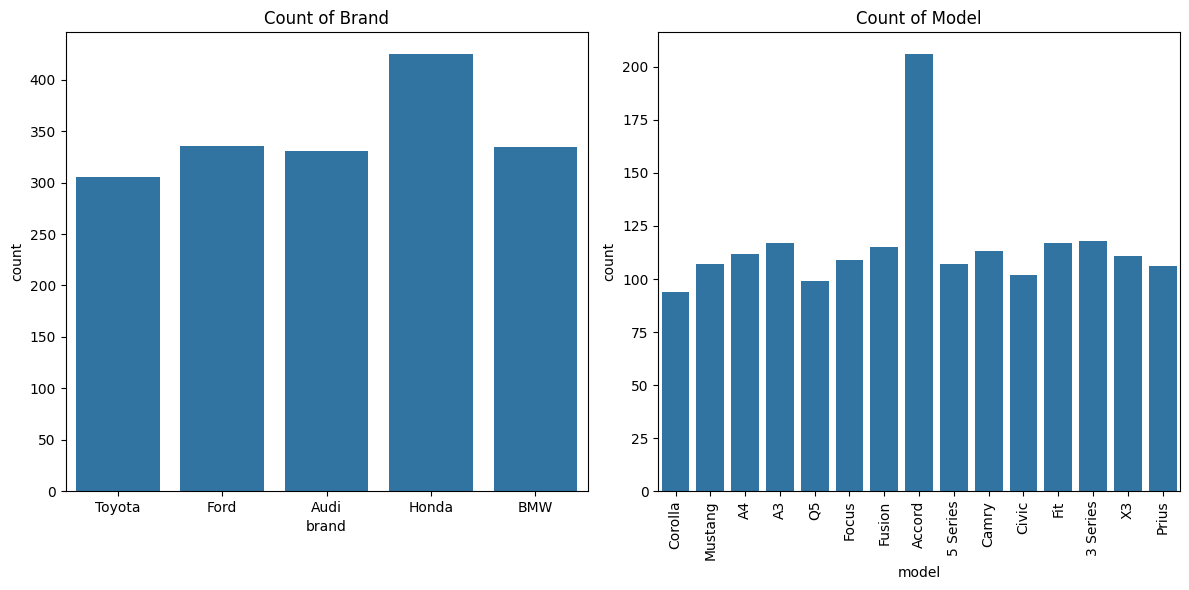

In [21]:
# Bar plot for categorical data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='brand', data=df, ax=axes[0])
axes[0].set_title('Count of Brand')
sns.countplot(x='model', data=df, ax=axes[1])
axes[1].set_title('Count of Model')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Box plot

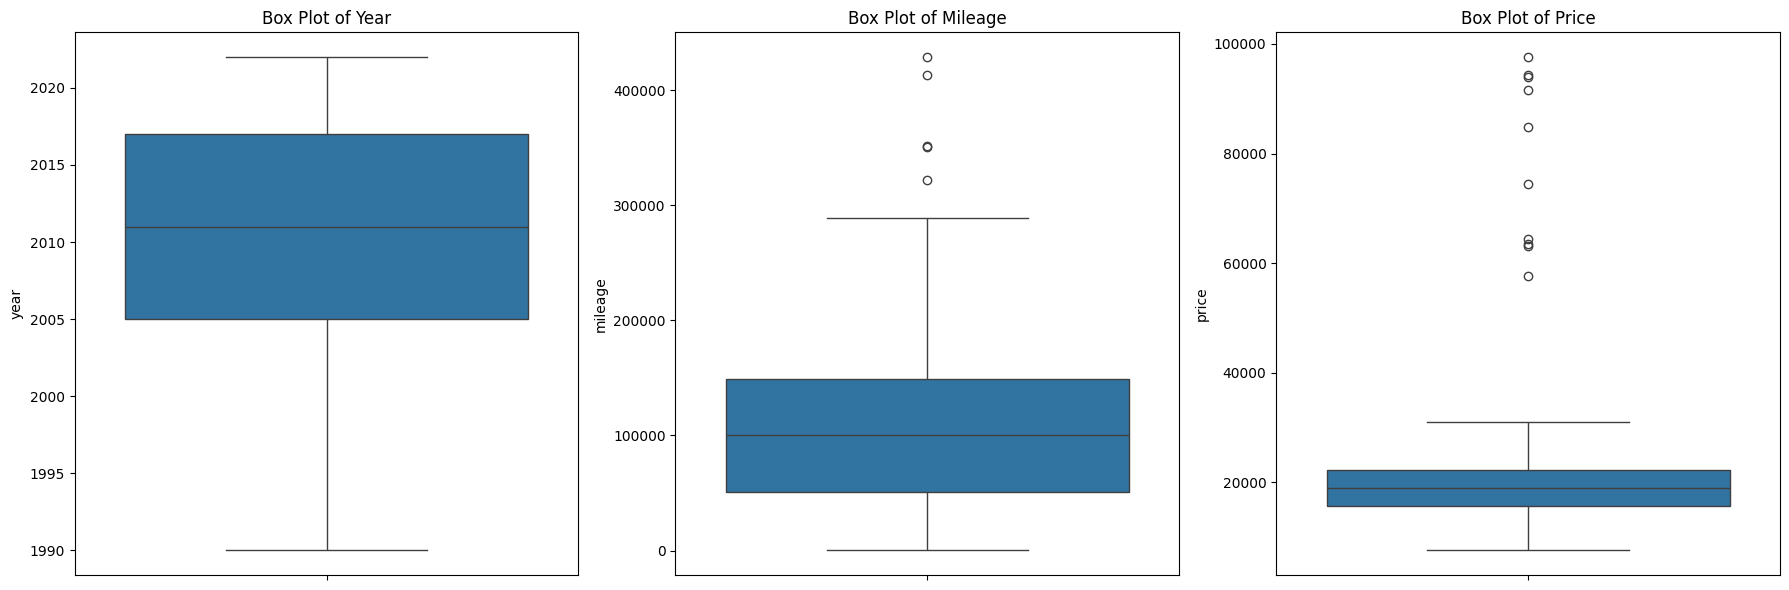

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y='year', data=df, ax=axes[0])
axes[0].set_title('Box Plot of Year')

sns.boxplot(y='mileage', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Mileage')

sns.boxplot(y='price', data=df, ax=axes[2])
axes[2].set_title('Box Plot of Price')

plt.tight_layout()
plt.show()


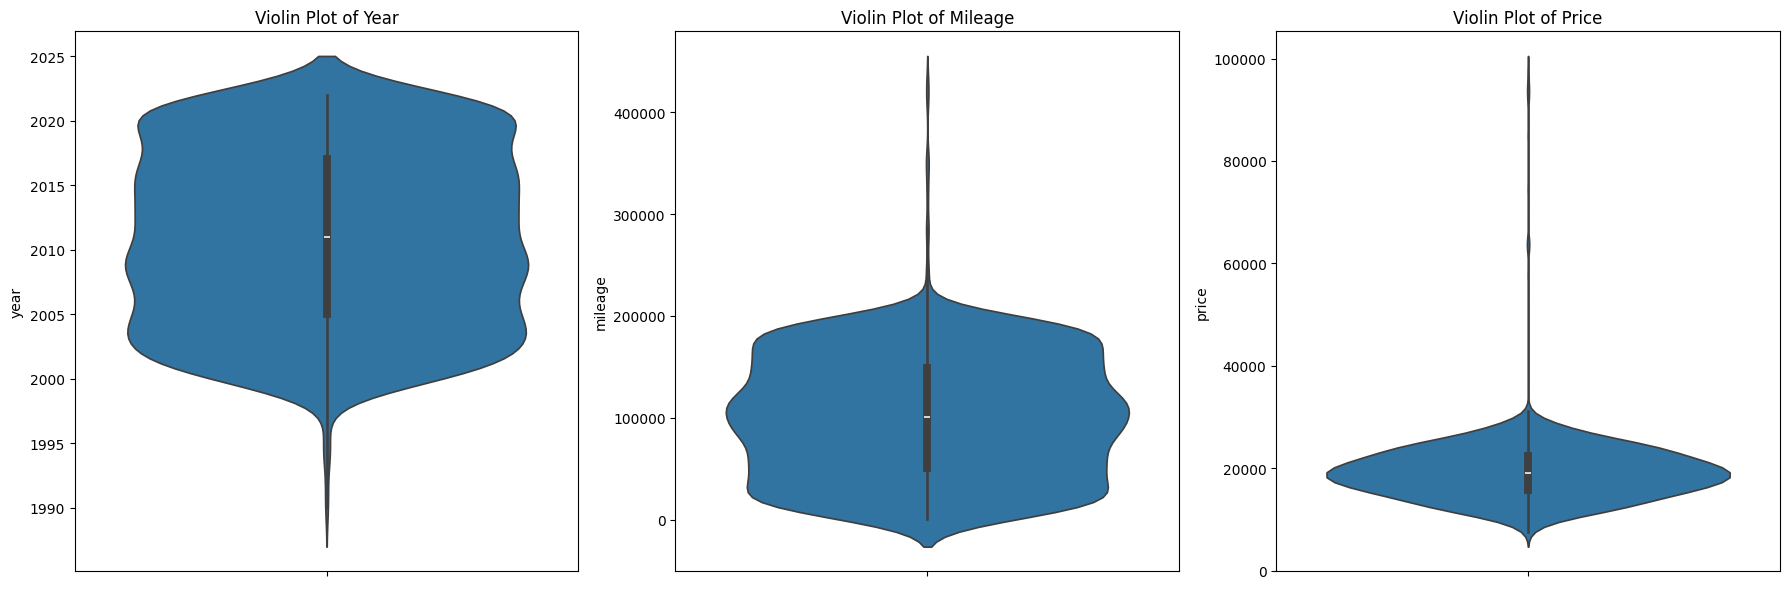

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(y='year', data=df, ax=axes[0])
axes[0].set_title('Violin Plot of Year')

sns.violinplot(y='mileage', data=df, ax=axes[1])
axes[1].set_title('Violin Plot of Mileage')

sns.violinplot(y='price', data=df, ax=axes[2])
axes[2].set_title('Violin Plot of Price')

plt.tight_layout()
plt.show()


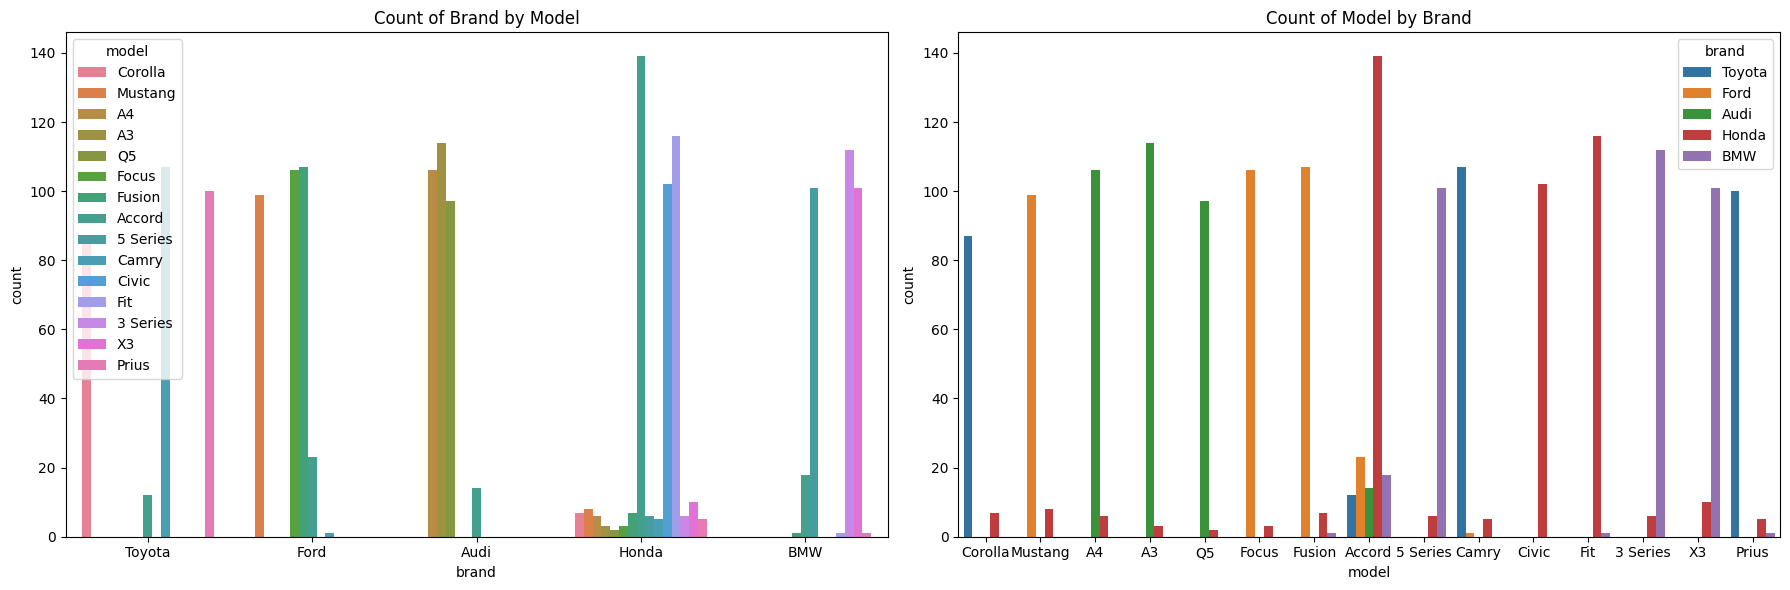

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='brand', hue='model', data=df, ax=axes[0])
axes[0].set_title('Count of Brand by Model')

sns.countplot(x='model', hue='brand', data=df, ax=axes[1])
axes[1].set_title('Count of Model by Brand')

plt.tight_layout()
plt.show()


In [25]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from mileage, year, and price columns
df_cleaned = df.copy()
for col in ['mileage', 'year', 'price']:
    df_cleaned = remove_outliers(df_cleaned, col)

print("DataFrame after removing outliers:")
print(df_cleaned)

DataFrame after removing outliers:
      year   mileage   brand    model    price
0     2006  194495.0  Toyota  Corolla  10347.0
1     2007   10390.0  Toyota  Corolla  22153.0
2     2011  111997.0    Ford  Mustang  18892.0
3     2015  143671.0    Audi       A4  18183.0
4     2002  119364.0    Audi       A3  13359.0
...    ...       ...     ...      ...      ...
1718  2014   30276.0    Ford  Mustang  25535.0
1719  2013  120092.0    Audi       A3  20746.0
1720  2019  193816.0   Honda  Mustang  17378.0
1721  2003   81659.0     BMW       X3  15384.0
1722  2013  188326.0  Toyota    Camry  14506.0

[1723 rows x 5 columns]


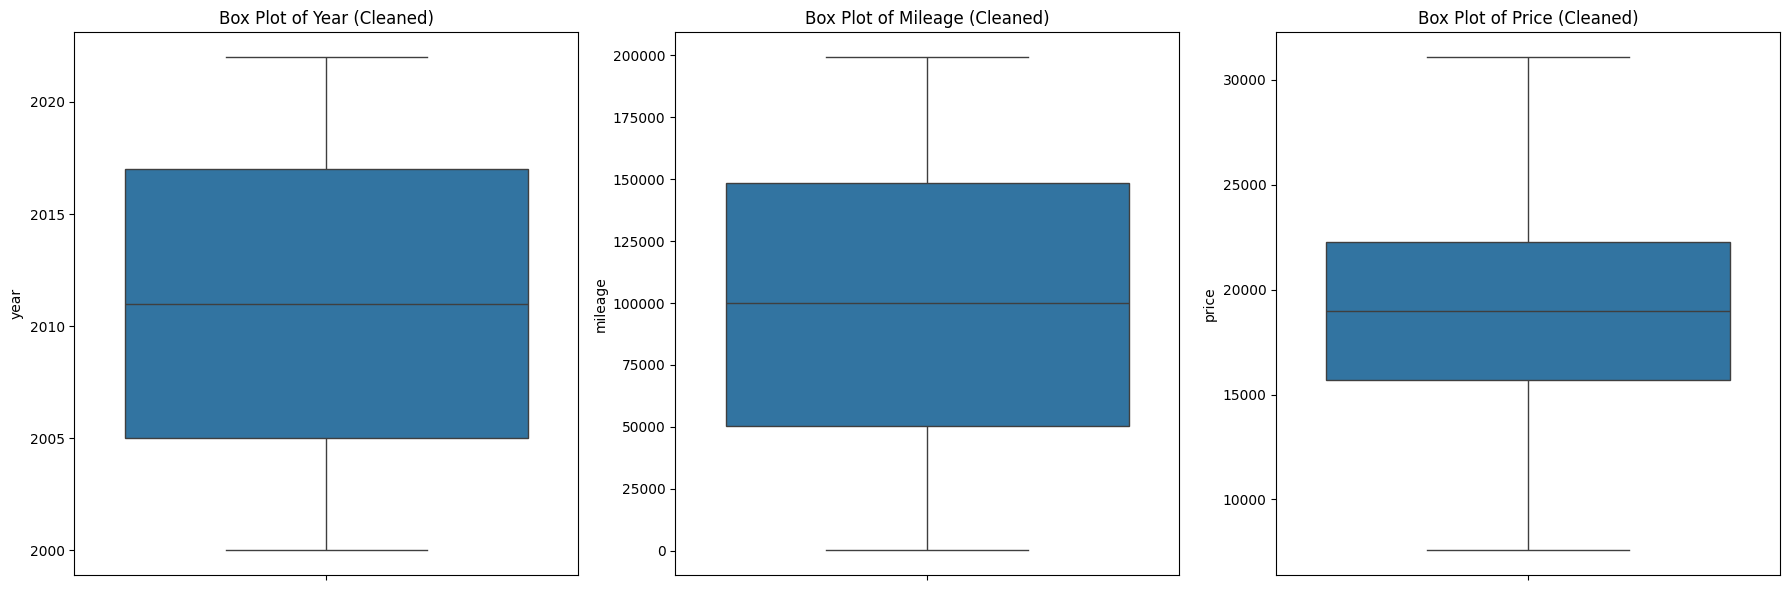

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y='year', data=df_cleaned, ax=axes[0])
axes[0].set_title('Box Plot of Year (Cleaned)')

sns.boxplot(y='mileage', data=df_cleaned, ax=axes[1])
axes[1].set_title('Box Plot of Mileage (Cleaned)')

sns.boxplot(y='price', data=df_cleaned, ax=axes[2])
axes[2].set_title('Box Plot of Price (Cleaned)')

plt.tight_layout()
plt.show()


In [27]:
df_cleaned.shape

(1723, 5)

In [28]:
X=df_cleaned.drop('price',axis=1)
y=df_cleaned['price']

In [29]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [43]:
print(num_features)
print(f"categorical feature{cat_features}")

Index(['year', 'mileage'], dtype='object')
categorical featureIndex(['brand', 'model'], dtype='object')


In [30]:
X = preprocessor.fit_transform(X)

In [31]:
X.shape

(1723, 22)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1378, 22)
(345, 22)
(1378,)
(345,)


#### Create an Evaluate Function to give all metrics after model Training

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [35]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1133.3283
- Mean Absolute Error: 976.4611
- R2 Score: 0.9353
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1174.4125
- Mean Absolute Error: 1020.2916
- R2 Score: 0.9386


Lasso
Model performance for Training set
- Root Mean Squared Error: 1134.0983
- Mean Absolute Error: 978.2134
- R2 Score: 0.9352
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1172.3262
- Mean Absolute Error: 1018.8547
- R2 Score: 0.9388


Ridge
Model performance for Training set
- Root Mean Squared Error: 1133.3929
- Mean Absolute Error: 976.8013
- R2 Score: 0.9352
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1173.7456
- Mean Absolute Error: 1019.8171
- R2 Score: 0.9386


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1186.2120
- Mean Absolute Error: 964.4691
- R2

### Results

In [36]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,0.938771
2,Ridge,0.938623
0,Linear Regression,0.938553
5,Random Forest Regressor,0.931594
7,AdaBoost Regressor,0.925838
6,XGBRegressor,0.914003
3,K-Neighbors Regressor,0.899110
4,Decision Tree,0.863888


In [37]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.86


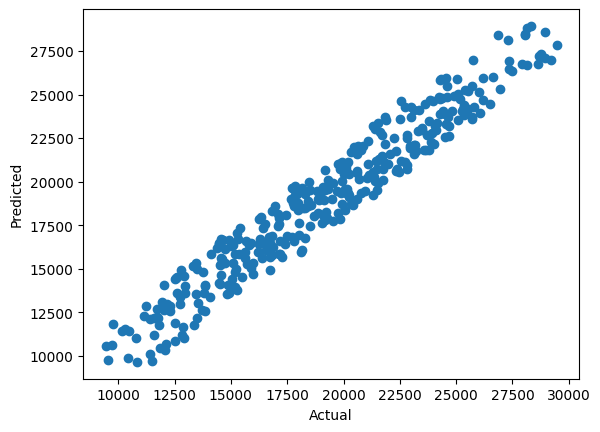

In [38]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

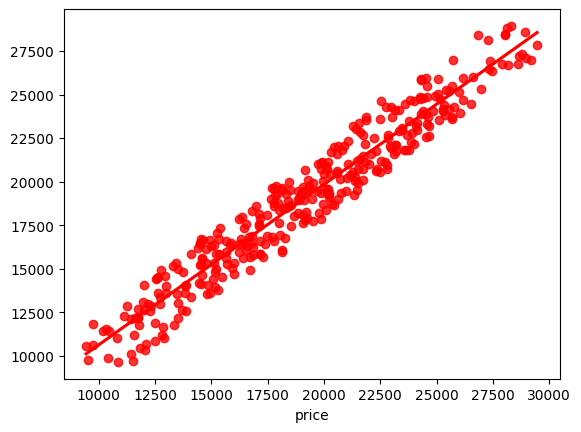

In [39]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [40]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
300,18045.0,16942.951122,1102.048878
1075,13698.0,12636.392322,1061.607678
535,19934.0,21110.155487,-1176.155487
1318,15164.0,13976.669544,1187.330456
561,11730.0,12662.507389,-932.507389
...,...,...,...
101,21315.0,19236.141199,2078.858801
1663,24247.0,24869.606812,-622.606812
107,17961.0,18792.433814,-831.433814
1605,22817.0,20739.365740,2077.634260
